# REPRESENTACIÓN DE TEXTO Y RECUPERACIÓN DE TEXTO

En primer lugar importamos algunas bibliotecas útiles y descargamos algunos corpus y paquetes populares de nltk.

In [1]:
import nltk
import string
import math
import numpy
import matplotlib

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/ivan/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/ivan/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/ivan/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/ivan/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/ivan/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/ivan/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

True



# Ejemplo 1

Obtener una lista de palabras clave a partir de un texto.

Usaremos el siguiente texto:

*The Chinese province at the center of the novel coronavirus outbreak reported a record spike in deaths Thursday, bringing the total number to more than 1300 people globally, as experts warned the epidemic could create havoc in less prepared countries.*



In [2]:

sentence = "The Chinese province at the center of the novel coronavirus outbreak reported a record spike in deaths Thursday, bringing the total number to more than 1300 people globally, as experts warned the epidemic could create havoc in less prepared countries."


Separamos el texto en tokens y los representamos en minúscula.

In [3]:
tokens_lowercase = [word.lower() for word in nltk.word_tokenize(sentence)]

Seleccionamos una lista de "stopwords" y un "stemmer.

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

Tomamos la lista de tokens y eliminamos los símbolos de puntación, las stopwords y transformamos a cada token en su correpondiente stem. El resultado es una lista de términos.

In [5]:
terms =[]
for token in tokens_lowercase:
  # Process each token
  if token not in string.punctuation:
    if token not in stopwords:
      token = stemmer.stem(token)
      terms.append(token)

---
# Ejemplo 2

Gener una representación vectorial de un pequeño corpus.

Creamos un corpus de juguete.



In [6]:
d1 = "El río Danubio pasa por Viena, su color es azul."
d2 = "El caudal de un río asciende en Invierno."
d3 = "El río Rhin y el río Danubio tienen mucho caudal."
d4 = "Si un río es navegable, es porque tiene mucho caudal." 

raw_corpus = [d1,d2,d3,d4]

Identificamos el conjunto de términos (palabras clave) del corpus y tranformamos a cada documento en una lista de términos. En este caso optamos por eliminar stopwords (en español) pero no aplicaremos stemming.

In [7]:
stopwords_spanish = nltk.corpus.stopwords.words('spanish')
term_set = set ()
corpus =[]
for  raw_document in raw_corpus:
  tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
  terms =[]
  for token in tokens_lowercase:
    if token not in string.punctuation:
      if token not in stopwords_spanish:
        terms.append(token)
        term_set.add(token)        
  corpus.append(terms)  
num_documents = len(corpus)  
num_terms = len(term_set)   

Creamos un mapeo de términos a números (ids).

In [8]:
term_to_id = {}
id = 0
for term in term_set:
  term_to_id[term] = id
  id += 1

Creamos una matriz TF.

In [9]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
  for term in set(document):
    term_id = term_to_id[term]
    tf_matrix[document_id][term_id] = float(document.count(term))
  document_id += 1


Creamos un vector IDF.

In [10]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

Creamos la matriz TF-IDF.

In [11]:
tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)

Normalizamos la matrtiz TF-IDF.

In [12]:
normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0
for document in tfidf_matrix:
  document_norm = numpy.linalg.norm(document)
  normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
  document_id += 1

Mostramos resultados.

In [13]:
print(term_to_id)
numpy.set_printoptions(precision=3)
print('TF')
print(tf_matrix)
print('IDF')
print(idf_vector)
print('TF_IDF')
print(tfidf_matrix)
print('TF_IDF NORMALIZADA')
print(normalized_tfidf_matrix)

{'azul': 0, 'invierno': 1, 'si': 2, 'caudal': 3, 'navegable': 4, 'danubio': 5, 'río': 6, 'rhin': 7, 'viena': 8, 'asciende': 9, 'color': 10, 'pasa': 11}
TF
[[1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 2. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]]
IDF
[0.602 0.602 0.602 0.125 0.602 0.301 0.    0.602 0.602 0.602 0.602 0.602]
TF_IDF
[[0.602 0.    0.    0.    0.    0.301 0.    0.    0.602 0.    0.602 0.602]
 [0.    0.602 0.    0.125 0.    0.    0.    0.    0.    0.602 0.    0.   ]
 [0.    0.    0.    0.125 0.    0.301 0.    0.602 0.    0.    0.    0.   ]
 [0.    0.    0.602 0.125 0.602 0.    0.    0.    0.    0.    0.    0.   ]]
TF_IDF NORMALIZADA
[[0.485 0.    0.    0.    0.    0.243 0.    0.    0.485 0.    0.485 0.485]
 [0.    0.7   0.    0.145 0.    0.    0.    0.    0.    0.7   0.    0.   ]
 [0.    0.    0.    0.182 0.    0.44  0.    0.879 0.    0.    0.    0.   ]
 [0.    0.    0.7   0.145 0.7   0.    0.    0.    0.    0.

---
# Ejemplo 3
Generamos una matriz TF-IDF a partir del corpus "Inaugural" provisto por nltk.



Identificamos el conjunto de términos (palabras clave) del corpus y transformamos a cada documento en una lista de términos.

In [14]:
corpus = []
term_set = set ()
filenames = []
filename_to_id ={}

id = 0
for filename in nltk.corpus.inaugural.fileids():
  filenames.append(filename)
  filename_to_id[filename] = id
  raw_document = nltk.corpus.inaugural.raw(filename)
  tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
  terms =[]
  for token in tokens_lowercase:
    # Process each token
    if token not in string.punctuation:
      if token not in stopwords:
        token = stemmer.stem(token)
        terms.append(token)
        term_set.add(token)        
  corpus.append(terms)
  id += 1  
num_documents = len(corpus)  
num_terms = len(term_set)   

Creamos un mapeo de términos a números (ids).

In [15]:
term_to_id = {}
id = 0
for term in term_set:
  term_to_id[term] = id
  id += 1

Creamos una matriz TF.

In [16]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
  for term in set(document):
    term_id = term_to_id[term]
    tf_matrix[document_id][term_id] = float(document.count(term))
  document_id += 1


Creamos un vector IDF.

In [17]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

Creamos la matriz TF-IDF.

In [18]:
tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)

Normalizamos la matrtiz TF-IDF.

In [19]:
normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0
for document in tfidf_matrix:
  document_norm = numpy.linalg.norm(document)
  normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
  document_id += 1

In [20]:
normalized_tfidf_matrix

array([[0.   , 0.021, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.014, 0.   , ..., 0.   , 0.   , 0.029],
       [0.   , 0.016, 0.   , ..., 0.   , 0.   , 0.032],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.07 ]])

# Ejercicios
1. Repita los pasos del ejemplo 3 sin aplicar stemming e identifique cuál es la palabra clave más representativa (según tfidf) en cada uno de los discursos.


---
### TP Resolución Ejercicio


In [21]:
def get_tfidf_matrix_without_stemming():
    corpus = []
    term_set = set ()
    filenames = []
    filename_to_id ={}

    id = 0
    for filename in nltk.corpus.inaugural.fileids():
      filenames.append(filename)
      filename_to_id[filename] = id
      raw_document = nltk.corpus.inaugural.raw(filename)
      tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
      terms =[]
      for token in tokens_lowercase:
        # Process each token
        if token not in string.punctuation:
          if token not in stopwords:
            #token = stemmer.stem(token)
            terms.append(token)
            term_set.add(token)        
      corpus.append(terms)
      id += 1  
    num_documents = len(corpus)  
    num_terms = len(term_set)   

    #Creamos un mapeo de términos a números (ids).
    term_to_id = {}
    id = 0
    for term in term_set:
      term_to_id[term] = id
      id += 1

    #Creamos una matriz TF.
    tf_matrix = numpy.zeros((num_documents, num_terms))
    document_id = 0

    for document in corpus:
      for term in set(document):
        term_id = term_to_id[term]
        tf_matrix[document_id][term_id] = float(document.count(term))
      document_id += 1


    #Creamos un vector IDF.
    idf_vector = numpy.zeros(num_terms)
    for term in term_set:
      term_document_frequency = 0
      for document in corpus:
        if term in document:
          term_document_frequency += 1
      idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

    #Creamos la matriz TF-IDF.
    tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)

    #Normalizamos la matrtiz TF-IDF.
    normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
    document_id = 0
    for document in tfidf_matrix:
      document_norm = numpy.linalg.norm(document)
      normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
      document_id += 1
    return filename_to_id, term_to_id, normalized_tfidf_matrix


In [22]:
files_id, terms_id, tfidf_matrix_without_stemming = get_tfidf_matrix_without_stemming()

In [23]:
import operator
import pandas as pd

print("Sin aplicar stemming la cantidad de terminos identificados son %d" % (len(terms_id),))

def get_representative_terms( tfidf_matrix):
    representative_term = { 'doc_id':[], 'doc_name':[], 'term_id':[] , 'term': [], 'tfidf_value':[]}
    key_filename_list = list(files_id.keys())
    index_filename_list = list(files_id.values())

    key_term_list = list(terms_id.keys())
    index_term_list = list(terms_id.values())

    for idx, doc_tfidf in enumerate(tfidf_matrix):
        index, value = max(enumerate(doc_tfidf), key=operator.itemgetter(1))
        representative_term.get('doc_id').append(idx)
        representative_term.get('doc_name').append(key_filename_list[index_filename_list.index(idx)])
        representative_term.get('term_id').append(index)
        representative_term.get('term').append(key_term_list[index_term_list.index(index)])
        representative_term.get('tfidf_value').append(value)
    return pd.DataFrame(representative_term)



df = get_representative_terms(tfidf_matrix_without_stemming)
df


Sin aplicar stemming la cantidad de terminos identificados son 9203


,doc_id,doc_name,term_id,term,tfidf_value
0,0,1789-Washington.txt,3472,impressions,0.119064
1,1,1793-Washington.txt,6618,arrive,0.313832
2,2,1797-Adams.txt,683,pleasing,0.183490
3,3,1801-Jefferson.txt,3272,thousandth,0.140736
4,4,1805-Jefferson.txt,248,whatsoever,0.140833
5,5,1809-Madison.txt,2970,improvements,0.158428
6,6,1813-Madison.txt,2747,british,0.226942
7,7,1817-Monroe.txt,6192,trials,0.115427
8,8,1821-Monroe.txt,340,colonies,0.113924
9,9,1825-Adams.txt,8592,union,0.152327


---
# Ejemplo 4

Determinar qué tan similares son los discursos inagurales de cada presidente de EEUU al de Donald Trump.

A partir de la matriz TF-IDF normalizada calculamos la similitud por coseno de cada documento con el documento que representa al discurso de Donald Trump.

In [24]:

target_document =  normalized_tfidf_matrix[filename_to_id['2017-Trump.txt']]
similarities = numpy.zeros(num_documents)
document_id = 0
for document in normalized_tfidf_matrix:
  similarities[document_id] = numpy.dot(document,target_document)
  document_id += 1

Mostramos un gráfico de barras horizontales representando las similitudes calculadas.

<BarContainer object of 58 artists>

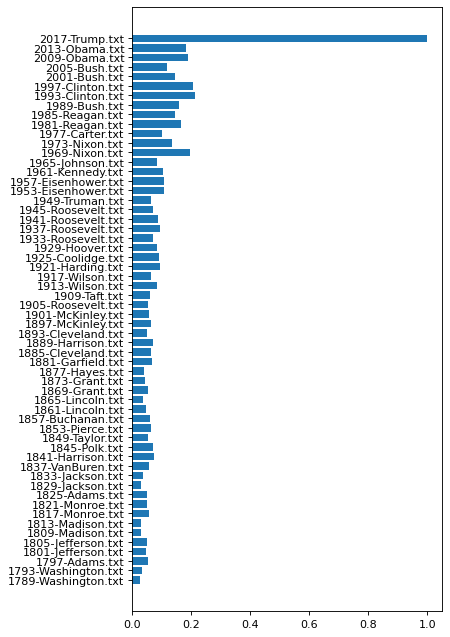

In [25]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
y_pos = numpy.arange(len(filenames))
matplotlib.pyplot.barh(y_pos,similarities,tick_label=filenames)

---
# Ejercicios


2.   Determinar cuál es el par de discursos más similares entre sí y cuál es el par de discursos menos similares entre sí.
3.   Dado un texto ingresado por el usario y un umbral de similitud *t*, devolver una lista con los identificadores de archivos de aquellos discursos cuya similutud al texto sea mayor a *t*.  La lista debe estar ordenada de mayor a menor grado de similitud al texto ingresado.

---
### TP Resolución - Ejercicio 2
Determinar cuál es el par de discursos más similares entre sí y cuál es el par de discursos menos similares entre sí.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

similarities_matrix = numpy.zeros((num_documents, num_documents))

for target_idx, target_tfidf in enumerate(normalized_tfidf_matrix):
    for idx, tfidf in enumerate(normalized_tfidf_matrix):
        similarities_matrix[target_idx][idx] = numpy.dot(tfidf,target_tfidf)

df_similarities = pd.DataFrame(similarities_matrix)
df_similarities.columns = filename_to_id.keys()
df_similarities['document'] =filename_to_id.keys()
df_similarities = df_similarities.set_index('document')
df_similarities

,1789-Washington.txt,1793-Washington.txt,1797-Adams.txt,1801-Jefferson.txt,1805-Jefferson.txt,1809-Madison.txt,1813-Madison.txt,1817-Monroe.txt,1821-Monroe.txt,1825-Adams.txt,...,1981-Reagan.txt,1985-Reagan.txt,1989-Bush.txt,1993-Clinton.txt,1997-Clinton.txt,2001-Bush.txt,2005-Bush.txt,2009-Obama.txt,2013-Obama.txt,2017-Trump.txt
document,,,,,,,,,,,,,,,,,,,,,
1789-Washington.txt,1.000000,0.060581,0.146691,0.116859,0.118963,0.141476,0.083793,0.168838,0.144859,0.148535,...,0.050135,0.053030,0.047324,0.046822,0.046326,0.049407,0.048432,0.065304,0.051186,0.028329
1793-Washington.txt,0.060581,1.000000,0.043315,0.036212,0.059563,0.025933,0.034212,0.045916,0.057348,0.042919,...,0.021921,0.012562,0.013652,0.032154,0.013549,0.027872,0.042191,0.011714,0.025433,0.034197
1797-Adams.txt,0.146691,0.043315,1.000000,0.137603,0.127011,0.173060,0.081831,0.206334,0.167938,0.196875,...,0.059001,0.063061,0.058639,0.079166,0.074175,0.063262,0.077893,0.088915,0.068930,0.054210
1801-Jefferson.txt,0.116859,0.036212,0.137603,1.000000,0.165344,0.170664,0.087201,0.158713,0.132794,0.168979,...,0.094178,0.084076,0.088760,0.070875,0.102074,0.087901,0.073529,0.101972,0.084736,0.047622
1805-Jefferson.txt,0.118963,0.059563,0.127011,0.165344,1.000000,0.143346,0.090732,0.194075,0.189201,0.194310,...,0.080410,0.069679,0.071737,0.062402,0.058809,0.071283,0.074324,0.094917,0.078937,0.052258
1809-Madison.txt,0.141476,0.025933,0.173060,0.170664,0.143346,1.000000,0.116790,0.199221,0.155834,0.195197,...,0.046596,0.060740,0.035746,0.048017,0.053432,0.046710,0.052017,0.053291,0.057168,0.029254
1813-Madison.txt,0.083793,0.034212,0.081831,0.087201,0.090732,0.116790,1.000000,0.128896,0.134442,0.097091,...,0.054908,0.039247,0.033920,0.045917,0.039303,0.053965,0.065238,0.061888,0.056154,0.031462
1817-Monroe.txt,0.168838,0.045916,0.206334,0.158713,0.194075,0.199221,0.128896,1.000000,0.362680,0.246809,...,0.079110,0.075951,0.076196,0.069351,0.068486,0.063159,0.069872,0.102010,0.080522,0.057262
1821-Monroe.txt,0.144859,0.057348,0.167938,0.132794,0.189201,0.155834,0.134442,0.362680,1.000000,0.237305,...,0.089838,0.072066,0.067997,0.072295,0.075942,0.061399,0.061475,0.082183,0.080344,0.049862


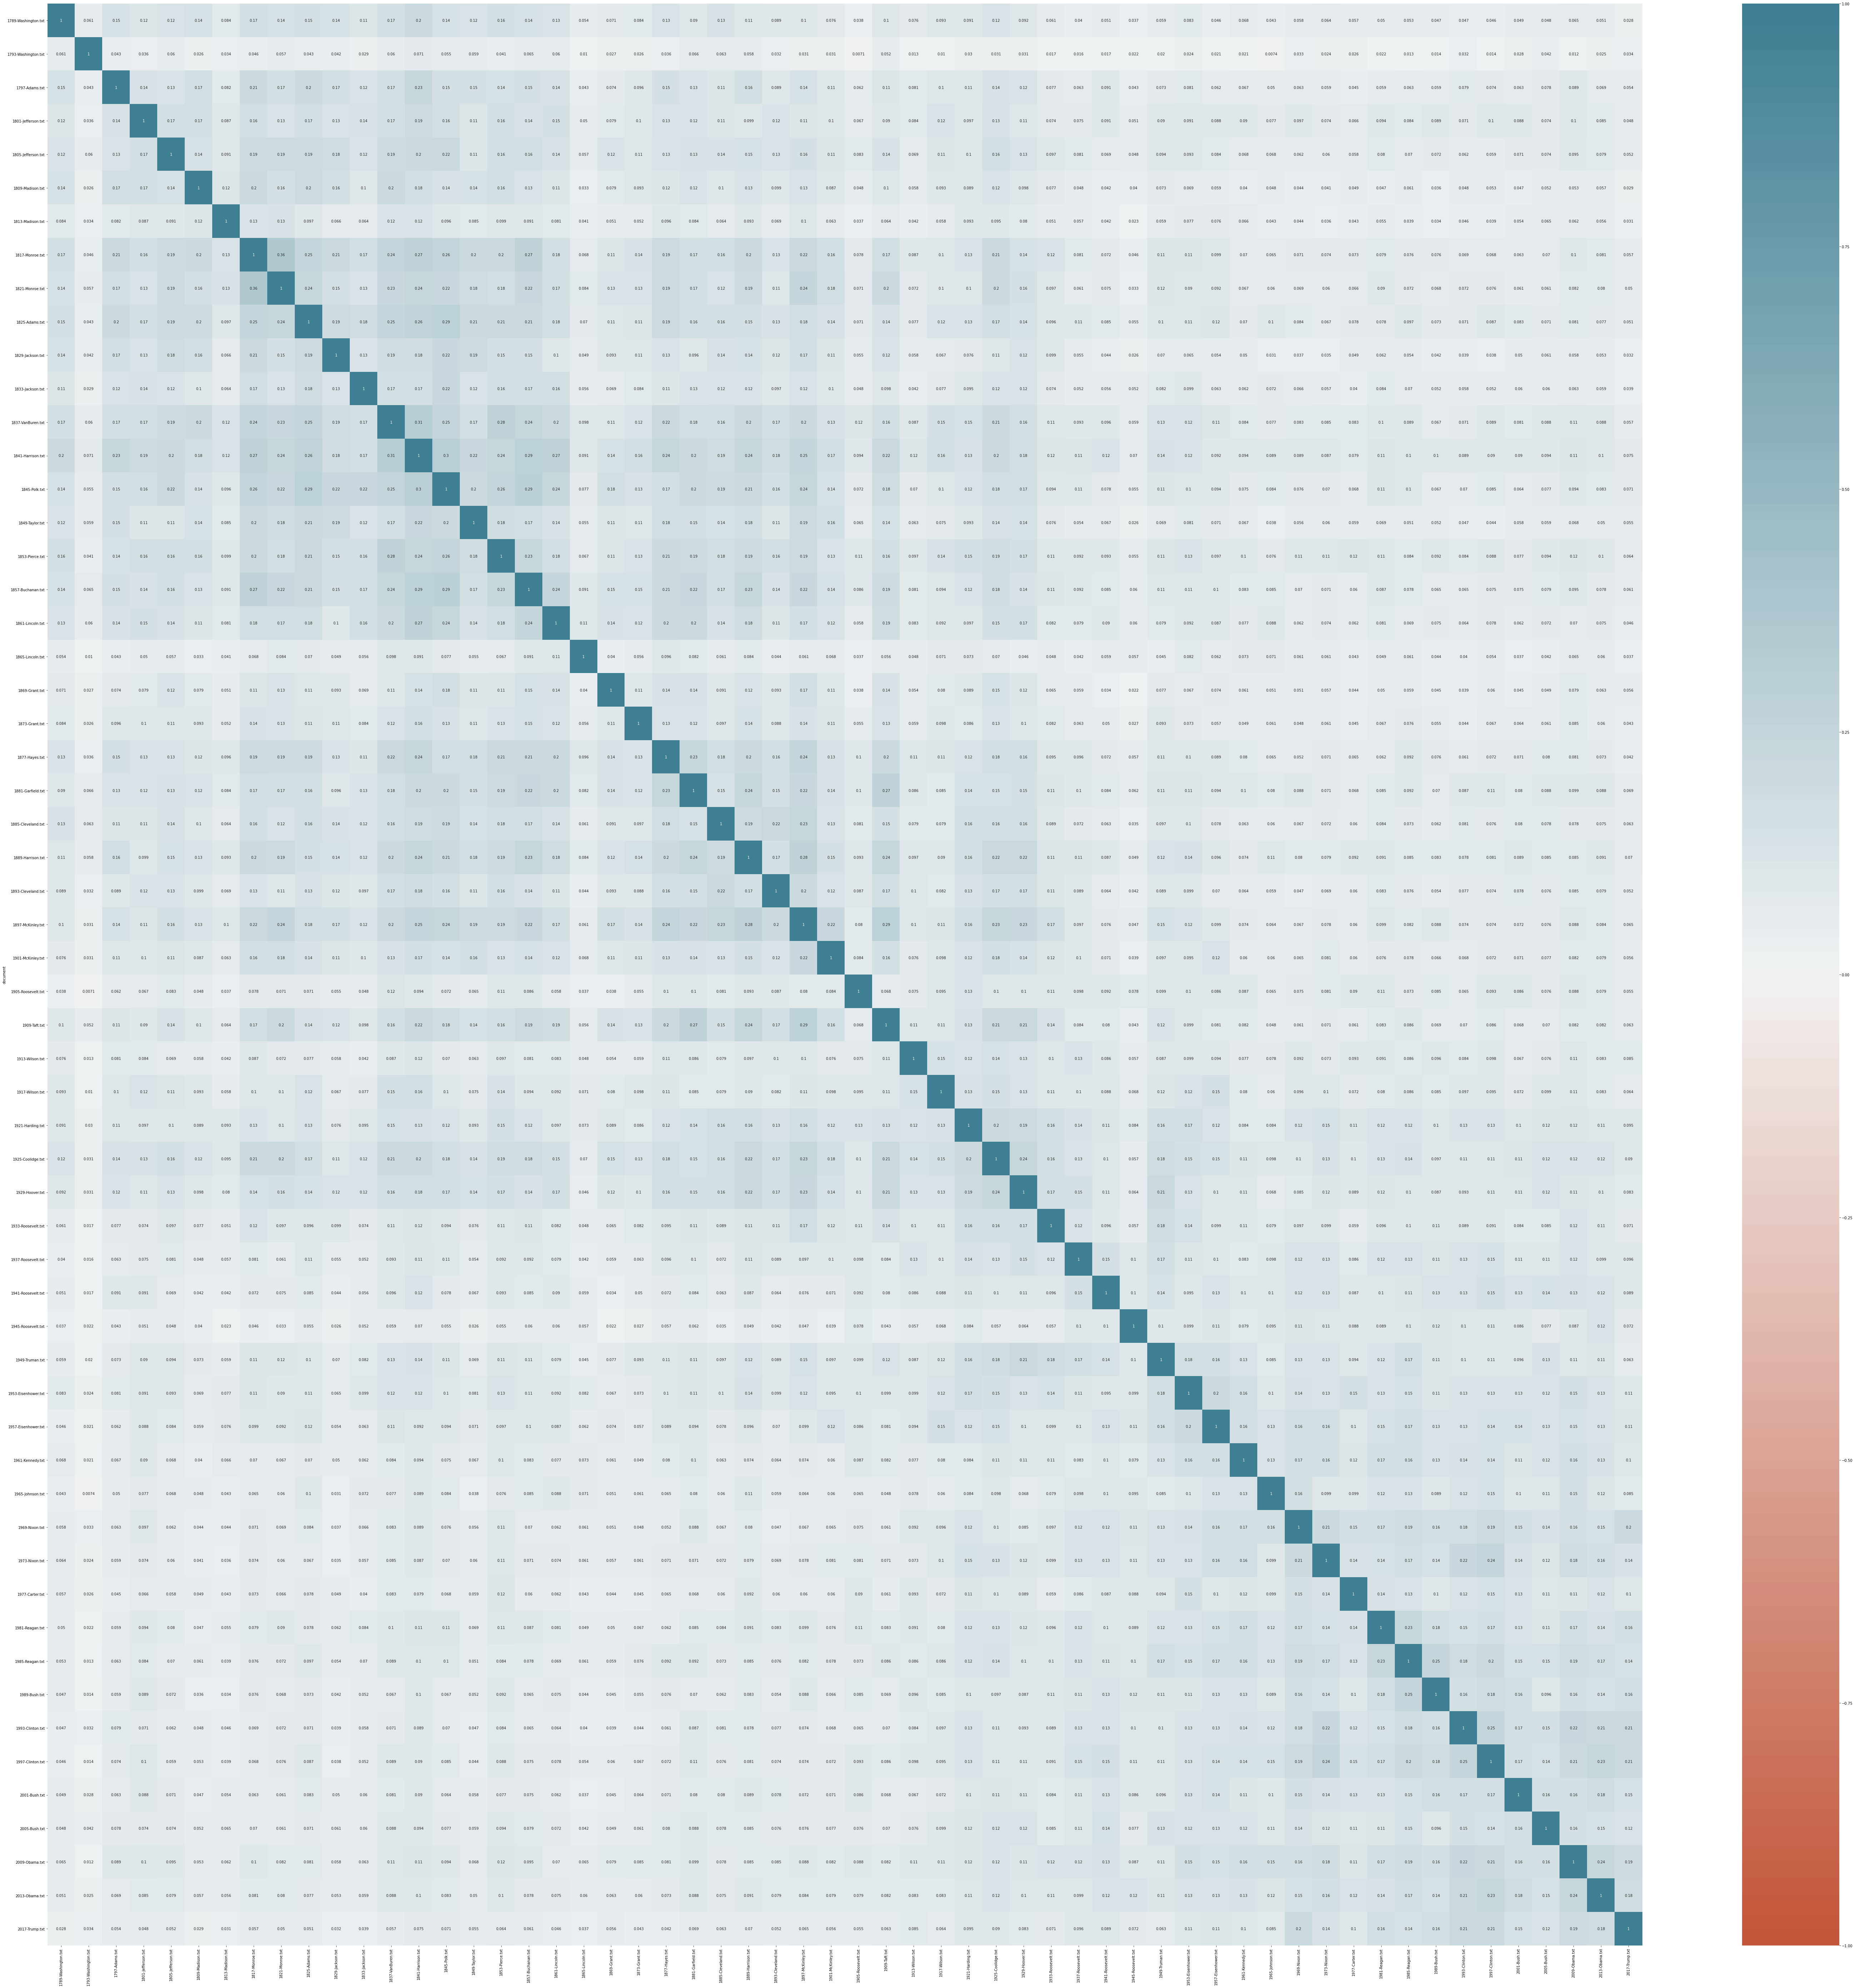

In [27]:
 
plt.figure(figsize=(100,100)) 
ax = sns.heatmap(df_similarities, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=False,
    annot=True)

In [28]:
def get_similarities_documents( similarities_matrix, files_id):
    similarities_documents = { 'doc_id':[], 'doc_name':[], 'similar_doc_id':[] , 'similar_doc_name': [], 'similarity_value':[]}
    key_filename_list = list(files_id.keys())
    index_filename_list = list(files_id.values())

    for idx, similarity_values in enumerate(similarities_matrix):
        similarity_values[idx] = 0 #= np.where(similarity_values == 1., 0, similarity_values)
        #print(similarity_values)
        index, value = max(enumerate(similarity_values), key=operator.itemgetter(1))
        similarities_documents.get('doc_id').append(idx)
        similarities_documents.get('doc_name').append(key_filename_list[index_filename_list.index(idx)])
        similarities_documents.get('similar_doc_id').append(index)
        similarities_documents.get('similar_doc_name').append(key_filename_list[index_filename_list.index(index)])
        similarities_documents.get('similarity_value').append(value)
    return pd.DataFrame(similarities_documents)

df_similarities_documents = get_similarities_documents(similarities_matrix, files_id)
df_similarities_documents


,doc_id,doc_name,similar_doc_id,similar_doc_name,similarity_value
0,0,1789-Washington.txt,13,1841-Harrison.txt,0.195706
1,1,1793-Washington.txt,13,1841-Harrison.txt,0.071187
2,2,1797-Adams.txt,13,1841-Harrison.txt,0.231708
3,3,1801-Jefferson.txt,13,1841-Harrison.txt,0.187996
4,4,1805-Jefferson.txt,14,1845-Polk.txt,0.217470
5,5,1809-Madison.txt,7,1817-Monroe.txt,0.199221
6,6,1813-Madison.txt,8,1821-Monroe.txt,0.134442
7,7,1817-Monroe.txt,8,1821-Monroe.txt,0.362680
8,8,1821-Monroe.txt,7,1817-Monroe.txt,0.362680
9,9,1825-Adams.txt,14,1845-Polk.txt,0.286042


---

### TP Resolución - Ejercicio 3
Dado un texto ingresado por el usuario y un umbral de similitud t, devolver una lista con los identificadores de archivos de aquellos discursos cuya similutud al texto sea mayor a t. La lista debe estar ordenada de mayor a menor grado de similitud al texto ingresado.

In [29]:
print('TF Matrix')
print(tf_matrix)
print('TFIDF Matrix')
print(tfidf_matrix)
print('Normalized TFIDF Matrix')
print(normalized_tfidf_matrix)

TF Matrix
[[0. 2. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 2. 0. ... 0. 0. 1.]
 [0. 2. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 2.]]
TFIDF Matrix
[[0.    0.414 0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.414 0.    ... 0.    0.    0.86 ]
 [0.    0.414 0.    ... 0.    0.    0.86 ]
 [0.    0.    0.    ... 0.    0.    1.721]]
Normalized TFIDF Matrix
[[0.    0.021 0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.014 0.    ... 0.    0.    0.029]
 [0.    0.016 0.    ... 0.    0.    0.032]
 [0.    0.    0.    ... 0.    0.    0.07 ]]


In [30]:
query_text = 'reviewing a new group of unsuccess agreement'

In [31]:
def get_tfidf_query(query, term_list, tfidf_matrix):
    tokens_lowercase = [word.lower() for word in nltk.word_tokenize(query)]
    #terms =[]
    term_set = set ()
    ds_tfidf = pd.DataFrame(tfidf_matrix)
    q_tfidf = numpy.zeros((len(term_list,)))
    
    for token in tokens_lowercase:
        if token not in string.punctuation:
            if token not in stopwords:
                token = stemmer.stem(token)
                #terms.append(token)
                term_set.add(token)  
            
    for term in term_set:
        term_id = term_list.get(term)
        if term_id != None:
            lista = list(ds_tfidf.iloc[:,term_id])
            n_document = len(lista)
            lista = [a for a in lista if a != 0]
            term_document_frequency = len(lista)
            q_tfidf[term_id] = math.log(float(n_document) / float(term_document_frequency),10)
    document_norm = numpy.linalg.norm(q_tfidf)
    normalize_q_tfidf = [w/document_norm for w in q_tfidf]
    return q_tfidf, normalize_q_tfidf

In [32]:
query_tfidf, normalized_query_tfidf = get_tfidf_query(query_text, term_to_id, normalized_tfidf_matrix)
print('TFIDF Query')
print(query_tfidf)
print('Normalized TFIDF Query')
print(normalized_query_tfidf)

TFIDF Query
[0. 0. 0. ... 0. 0. 0.]
Normalized TFIDF Query
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [33]:
target_query =  normalized_query_tfidf
similarities = numpy.zeros(num_documents)
document_id = 0
for document in normalized_tfidf_matrix:
  similarities[document_id] = numpy.dot(document,target_query)
  document_id += 1

In [34]:
df_similarities = pd.DataFrame(similarities)

len(df_similarities)
df_similarities['document'] = filename_to_id.keys()
df_similarities.columns = ['similarity', 'document']
df_similarities = df_similarities.set_index('document')
df_similarities=df_similarities.sort_values(by=['similarity'], ascending=False)
df_similarities

,similarity
document,
1949-Truman.txt,0.083799
1917-Wilson.txt,0.052810
1877-Hayes.txt,0.048828
1981-Reagan.txt,0.035016
1881-Garfield.txt,0.028680
1929-Hoover.txt,0.021379
1821-Monroe.txt,0.021197
1933-Roosevelt.txt,0.018118
1825-Adams.txt,0.015424


In [35]:
def get_similar_document_from_query(query, umbral, normalized_tfidf, term_to_id, filename_to_id):
    query_tfidf, normalized_query_tfidf = get_tfidf_query(query_text, term_to_id, normalized_tfidf_matrix)
    n_documents = len(filename_to_id)
    similarities = numpy.zeros(n_documents)
    document_id = 0
    for document in normalized_tfidf:
        similarities[document_id] = numpy.dot(document,normalized_query_tfidf)
        document_id += 1
    df_similarities = pd.DataFrame(similarities)
    df_similarities['document'] = filename_to_id.keys()
    df_similarities.columns = ['similarity', 'document']
    df_similarities = df_similarities.set_index('document')
    df_similarities.sort_values(by=['similarity'], ascending=False)
    return df_similarities[df_similarities.similarity >= umbral]

### Respuesta 
    Query = 'reviewing a new group of unsuccess agreement'

In [36]:
query_text = 'reviewing a new group of unsuccess agreement'
df_test = get_similar_document_from_query(query_text, 0.008, normalized_tfidf_matrix, term_to_id, filename_to_id)
df_test

,similarity
document,
1821-Monroe.txt,0.021197
1825-Adams.txt,0.015424
1877-Hayes.txt,0.048828
1881-Garfield.txt,0.028680
1909-Taft.txt,0.014639
1913-Wilson.txt,0.011212
1917-Wilson.txt,0.052810
1929-Hoover.txt,0.021379
1933-Roosevelt.txt,0.018118




---
# Ejemplo 5

Crear un índice invertido simple.


In [37]:
term_to_document_ids ={}
for term in term_set:
    term_id = term_to_id[term]
    document_ids = [] 
    term_column = tf_matrix[:,term_to_id[term]]
    for idx in range(0, len(term_column)): 
        if term_column[idx] > 0: 
            document_ids.append(idx) 
    term_to_document_ids[term] = document_ids
    
len(term_to_document_ids)


5574

---
# Ejercicios

4.   Repita el ejercicio 3 haciendo uso del índice (además de utilizar la matriz TF-IDF).
5. Identifique las limitaciones del índice invertido simple implementado.

---
### Resolución ejercicio 4 
Repita el ejercicio 3 haciendo uso del índice (además de utilizar la matriz TF-IDF).

In [38]:
query_text = 'reviewing a new group of unsuccess agreement'

In [39]:
tokens_lowercase_4 = [word.lower() for word in nltk.word_tokenize(query_text)]
term_set_4 = set ()
for token in tokens_lowercase_4:
    if token not in string.punctuation:
        if token not in stopwords:
            token = stemmer.stem(token)
            term_set_4.add(token)  
print(term_set_4)
            
doc_term_query = set()
for term in term_set_4:
    t = term_to_document_ids.get(term)
    if t != None:
        doc_term_query.update(t)
print(doc_term_query)

{'agreement', 'group', 'unsuccess', 'new', 'review'}
{0, 2, 4, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57}


In [40]:
def get_filter_tfidf_query(query, term_list, inverted_index, n_document):
    tokens_lowercase = [word.lower() for word in nltk.word_tokenize(query)]
    term_set = set ()
    q_tfidf = numpy.zeros((len(term_list,)))
    
    for token in tokens_lowercase:
        if token not in string.punctuation:
            if token not in stopwords:
                token = stemmer.stem(token)
                term_set.add(token)  
            
    for term in term_set:
        term_id = term_list.get(term)
        if term_id != None: 
            term_document_frequency = len(inverted_index.get(term))
            q_tfidf[term_id] = math.log(float(n_document) / float(term_document_frequency),10)
    document_norm = numpy.linalg.norm(q_tfidf)
    normalize_q_tfidf = [w/document_norm for w in q_tfidf]
    return q_tfidf, normalize_q_tfidf, term_set

def get_similar_document_from_query_inverted_index(query, umbral, inverted_index, term_to_id, filename_to_id, tfidf_matrix):
    n_documents = len(filename_to_id)
    query_tfidf, normalized_query_tfidf, tokens = get_filter_tfidf_query(query, term_to_id, inverted_index, n_documents)
    doc_term_query = set()
    for term in tokens:
        t = inverted_index.get(term)
        if t != None:
            doc_term_query.update(t)
    n_documents_filtered = len(doc_term_query)
    similarities = { 'document':[], 'similarity':[] }
                    
    
    df_tfidf_matrix = pd.DataFrame(tfidf_matrix)
    df_tfidf_matrix_filtered = df_tfidf_matrix.loc[doc_term_query,:]   
    key_filename_list = list(filename_to_id.keys())
    val_filename_list = list(filename_to_id.values())
    
    document_id = 0
    for index, row in df_tfidf_matrix_filtered.iterrows():
        similarities.get('similarity').append(numpy.dot(list(row),query_tfidf))
        position = val_filename_list.index(index)
        similarities.get('document').append(key_filename_list[position])
     
    df_similarities = pd.DataFrame(similarities)
    #df_similarities['document'] = filename_to_id.keys()
    #df_similarities.columns = ['similarity', 'document']
    df_similarities = df_similarities.set_index('document')
    df_similarities = df_similarities.sort_values(by=['similarity'], ascending=False)
    return df_similarities[df_similarities.similarity >= umbral]


### Respuesta ejercicio 4
    Query = 'reviewing a new group of unsuccess agreement'

In [41]:
query_text = 'reviewing a new group of unsuccess agreement'
df_similarity_inverted = get_similar_document_from_query_inverted_index(query_text, 1.0,term_to_document_ids, term_to_id, filename_to_id, tfidf_matrix)
df_similarity_inverted

,similarity
document,
1949-Truman.txt,5.708257
1877-Hayes.txt,3.120404
1981-Reagan.txt,2.635213
1881-Garfield.txt,2.292956
1909-Taft.txt,2.287593
1917-Wilson.txt,2.282230
1821-Monroe.txt,2.276867
1929-Hoover.txt,2.001884
1989-Bush.txt,1.208152


## Resolución ejercicio 5
Identifique las limitaciones del índice invertido simple implementado.

Una de las limitaciones identificadas al momento utilizar índice invertido, es que no es factible usar lo indices de las matriz como claves de los documentos. Esa limitación se identifico al momento de usar el índice invertido para filtar los indices la matriz TFIDF con solo los documentos que contienen algun termino de la consulta, al momento de hacer ese filtrado se pierde la correspondencia indice-clave documento. En este caso tuve que convertir la matriz en otro tipo de colección, en mi caso particular un DataFrame.